# Etude du *transfert de commentateurs*

**Laboratoire MNHS, Epitech, Paris**

## Contexte
Lors de la soirée Pixel war, plusieurs streamers ont organisé des directs pour commenter l'évènement. Nous avons extraits les commentaires et étudier le phénomène de transfert de commentateurs, i.e. le mouvement des commentateurs d'un chat à un autre. Les résultats de l'étude permettent d'évaluer l'attractivité des streamers.

In [13]:
from prepare import build_dataset

In [21]:
dataset = build_dataset(rootdir='./data/RPZ-mariage')

In [68]:
import pandas as pd
streamerz = dataset.streamer.unique()
d0 = dataset.drop(['cdate', 'ctimestamp'], axis=1)
heatmap_data = pd.Series(0, index=pd.MultiIndex.from_product([streamerz, streamerz]))
for s in streamerz:
    d1 = d0[dataset.streamer.str.contains(s)]
    d2 = d0[~dataset.streamer.str.contains(s)]
    d3 = pd.merge(d1, d2, on='commentator', suffixes=['_left', '_right'])
    d4 = d3.groupby(['streamer_left', 'streamer_right']).apply(lambda x: x.commentator.unique().size)
    heatmap_data[d4.index] = d4
heatmap_data

Lamatrak  Lamatrak         0
          Ultia           66
          KiddyFR         17
          Drakony         37
          MoMaN           20
                          ..
Hexakil   Berlu            5
          BagheraJones     9
          Ponce           14
          Tonton           8
          Hexakil          0
Length: 289, dtype: int64

## Graphicx : HeatMap des contributions des streamers

En x et en y, les streamers. La valeur de (x, y) correspond au nombre de commentaateurs qui ont commenté à la fois sur x et y.

**Exemple**: ('Lamatrak', 'Ultia') = 66 signifie que 66 commentateurs ont été à la fois sur les chats des streamers 'Lamatrak' et 'Ultia'.

streamerz

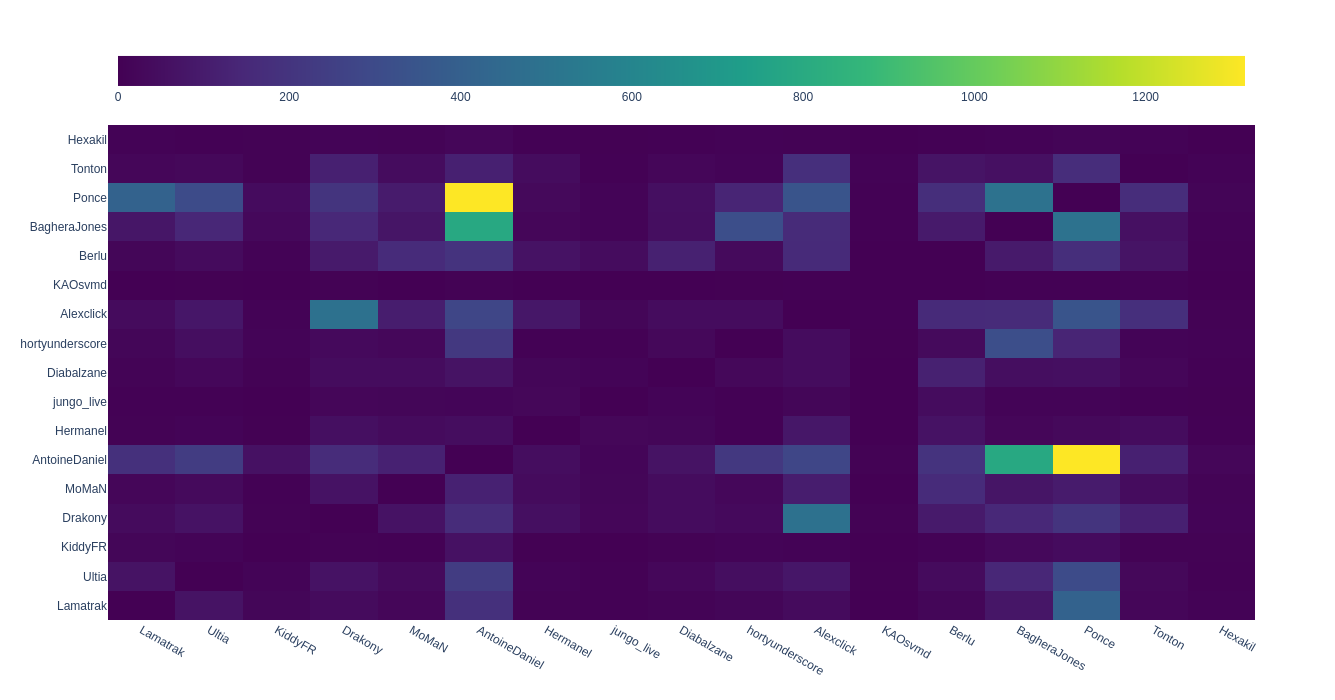

In [115]:
import plotly.graph_objects as go
dataset = [heatmap_data[index] for index in streamerz]

fig = go.Figure()
fig.update_layout(width=700, height=700)
fig.update_xaxes(categoryarray=list(streamerz), categoryorder="array")
fig.update_yaxes(categoryarray=streamerz, categoryorder="array")

fig.add_trace(go.Heatmap(
    z=dataset,
    colorbar=dict(orientation='h'),
    colorscale="Viridis",
    x=streamerz,
    y=streamerz,
    hovertemplate = '<i>from: </i>%{x}' + '<br><i>to: </i> %{y}<br>' + '<i>commentators:</i> %{z}<extra></extra>'
))
fig.update_layout(hoverlabel_align = 'left')

fig.show()